# Andrew Ng’s Regressão Linear - Solução Pythônica

### Regressão Linear Multivariável

![regressao linear multivariavel](Imagens/regressao-linear-multivariavel.png)

![regressao linear multivariavel hipotese](Imagens/regressao-linear-multivariavel-hipotese.png)

In [281]:
# importando as bibliotecas do python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [282]:
# importando os dados
data = pd.read_csv('ex1data2.txt', names=['Tamanho', 'Quartos', 'Preço'])

In [283]:
# visualizando os 5 primeiros dados
data.head()

Tamanho  Quartos   Preço
0     2104        3  399900
1     1600        3  329900
2     2400        3  369000
3     1416        2  232000
4     3000        4  539900

In [284]:
X = data.drop(['Preço'], axis=1)  # removendo a coluna de preços do X
Y = data["Preço"] # pegando a coluna do preço das casas

In [285]:
# visualizando a dimensão dos dados
print(X.shape)
print(Y.shape)

(47, 2)
(47,)


In [286]:
m = len(Y) # número de exemplos treináveis

![nomralizacao dos dados](Imagens/normalizacao-dos-dados.png)

In [287]:
def Normaliza(x):
    '''
    Função responsável por normalizar os valores
    '''
    
    x_normalizado = (x - np.mean(x)) / np.std(x) # aplica a normalização dos dados
    media = np.mean(x) # calcula a média dos dados
    sigma = np.std(x) # calcula o desvio padrão dos dados
    
    return x_normalizado, media, sigma

In [288]:
X, media, desvio = Normaliza(X) # aplica a normalização nos dados

In [289]:
X

Tamanho   Quartos
0   0.131415 -0.226093
1  -0.509641 -0.226093
2   0.507909 -0.226093
3  -0.743677 -1.554392
4   1.271071  1.102205
5  -0.019945  1.102205
6  -0.593589 -0.226093
7  -0.729686 -0.226093
8  -0.789467 -0.226093
9  -0.644466 -0.226093
10 -0.077182  1.102205
11 -0.000866 -0.226093
12 -0.140779 -0.226093
13  3.150993  2.430504
14 -0.931924 -0.226093
15  0.380715  1.102205
16 -0.865783 -1.554392
17 -0.972626 -0.226093
18  0.773743  1.102205
19  1.310501  1.102205
20 -0.297227 -0.226093
21 -0.143323 -1.554392
22 -0.504553 -0.226093
23 -0.049200  1.102205
24  2.403094 -0.226093
25 -1.145609 -0.226093
26 -0.690256 -0.226093
27  0.668173 -0.226093
28  0.253521 -0.226093
29  0.809358 -0.226093
30 -0.205648 -1.554392
31 -1.272803 -2.882690
32  0.050011  1.102205
33  1.445326 -0.226093
34 -0.241262  1.102205
35 -0.716966 -0.226093
36 -0.968810 -0.226093
37  0.167030  1.102205
38  2.816474  1.102205
39  0.205188  1.102205
40 -0.428237 -1.554392
41  0.301855 -0.226093
42  0.720322  1.102205
43 -1.018415 -0.226093
44 -1.461049 -1.554392
45 -0.189113  1.102205
46 -1.014600 -0.226093

In [290]:
media

Tamanho    2000.680851
Quartos       3.170213
dtype: float64

In [291]:
desvio

Tamanho    786.202619
Quartos      0.752843
dtype: float64

In [292]:
X = np.append(np.ones([m,1]), X, axis=1) #adicionando a constante x0 = 1
Y = np.array(Y).reshape(-1,1) # ajustando a dimensão para mx1
teta = np.zeros([3,1]) ## inicializando um vetor de zeros para armazenar os coeficientes da equação da reta

In [293]:
print(X.shape)
print(Y.shape)

(47, 3)
(47, 1)


In [294]:
def Custo(x, y, teta):
    '''
    Retorna o custo (erro da predição)
    '''
    m = len(y)              # número de exemplos treináveis
    
    h = x.dot(teta)        # definindo a hipótese do algoritmo
    
    J = 1/(2*m)*(np.sum((h-y)**2))             # Implementando a função de custo
    
    return J                # retorna o cursto

In [295]:
custo = Custo(X, Y, teta)  # Chama a função que calcula o custo e a imprime
print(custo)   

65591548106.45744


In [296]:
interacoes = 400 # número de interações
alfa = 0.01 # taxa de aprendizado

def GradienteDescendente(x, y, teta, alfa, interacoes):
    '''
    Calculando o gradiente descendente para minizar o custo
    '''   
    historico_custo = [] # define uma lista vazia para armazenar o valor do custo em cada interação
    
    m = len(y) # número de exemplos treináveis
    
    for i in range(interacoes): # intera 1000 vezes
        
        h = x.dot(teta) # calcula a hipotese
        
        teta = teta - (alfa/m) * (x.T.dot(h-y)) # aplica o gradiente descendente
        
        historico_custo.append(Custo(x, y, teta)) # adiciona o valor do custo em cada etapa (erro de predição)
        
    return teta, historico_custo

In [297]:
# obtendo os parâmetros da equação da reta e o histórico do custo em cada etapa de treinamento
novo_teta, historico_custo = GradienteDescendente(X, Y, teta, alfa, interacoes)

In [298]:
novo_teta

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

In [299]:
novo_custo = Custo(X, Y, novo_teta)

In [300]:
print(custo)
print(novo_custo)

65591548106.45744
2105448288.6292474


Text(0.5, 1.0, 'Minimizando o custo usando gradiente descendente')

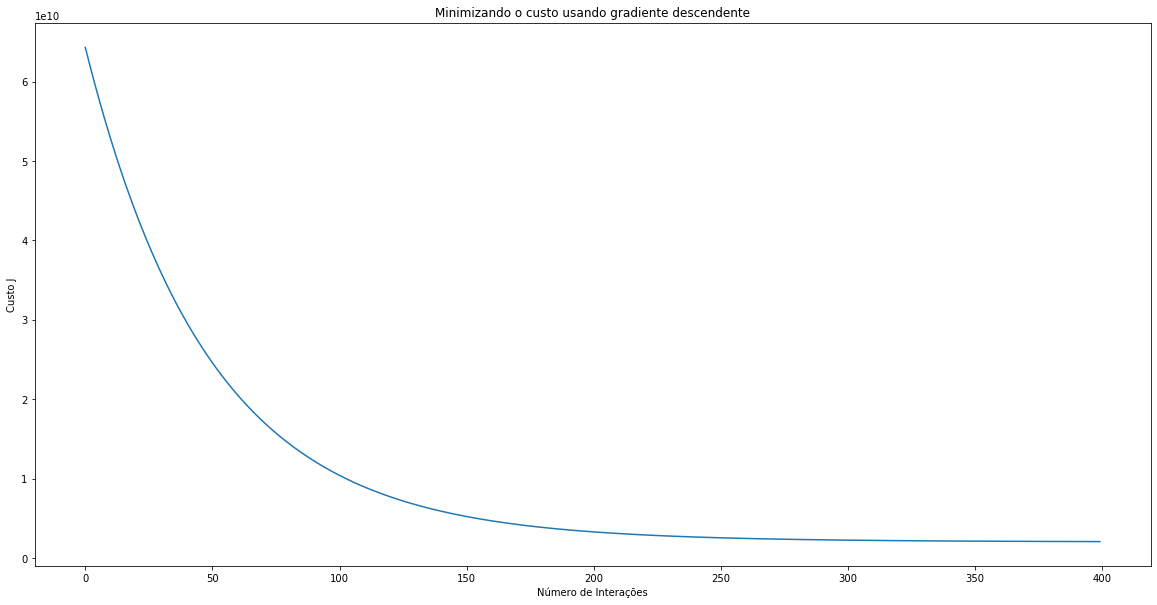

In [301]:
plt.figure(figsize = (20, 10))
plt.plot(historico_custo)
plt.ylabel('Custo J')
plt.xlabel('Número de Interações')
plt.title('Minimizando o custo usando gradiente descendente')

![escolhendo taxa de aprendizado](Imagens/escolhendo-taxa-de-aprendizado.png)

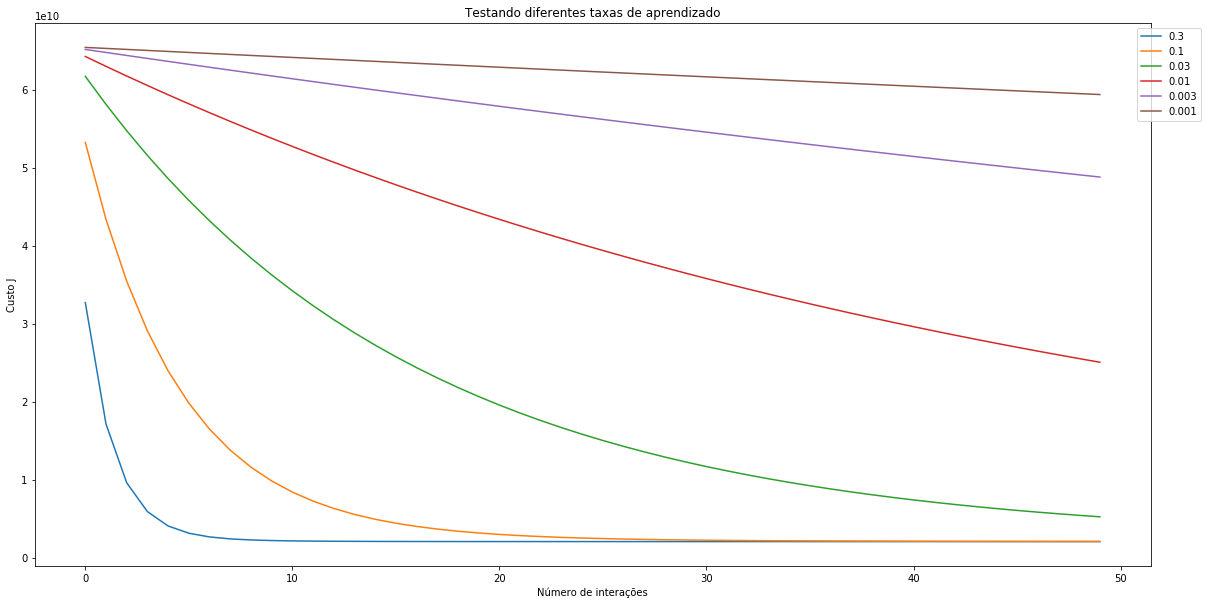

In [302]:
teta1, j_hist1 = GradienteDescendente(X, Y, teta, 0.3, 50)
teta2, j_hist2 = GradienteDescendente(X, Y, teta, 0.1, 50)
teta3, j_hist3 = GradienteDescendente(X, Y, teta, 0.03, 50)
teta4, j_hist4 = GradienteDescendente(X, Y, teta, 0.01, 50)
teta5, j_hist5 = GradienteDescendente(X, Y, teta, 0.003, 50)
teta6, j_hist6 = GradienteDescendente(X, Y, teta, 0.001, 50)

plt.figure(figsize = (20,10))

plt.plot(j_hist1, label = '0.3')
plt.plot(j_hist2, label = '0.1')
plt.plot(j_hist3, label = '0.03')
plt.plot(j_hist4, label = '0.01')
plt.plot(j_hist5, label = '0.003')
plt.plot(j_hist6, label = '0.001')

plt.title('Testando diferentes taxas de aprendizado')
plt.xlabel('Número de interações')
plt.ylabel('Custo J')
plt.legend(bbox_to_anchor=(1.05, 1.0))

In [303]:
teta, historico__custo = GradienteDescendente(X, Y, teta, alfa = 0.3, interacoes = 1500)
print(teta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


> Prevendo o preço de uma casa com 1650 $m^{2}$ e 3 quartos.

In [304]:
X_teste = np.array([2400, 3])

In [305]:
media = np.array(media)
desvio = np.array(desvio)

X_teste = (X_teste - media)/desvio

In [306]:
X_teste = np.append(1, X_teste) # adicionando a constante xo = 1

In [307]:
X_teste = np.reshape(X_teste, (1,3))

In [308]:
X_teste

array([[ 1.        ,  0.5079087 , -0.22609337]])

In [309]:
def predicao(x, teta):
    '''
    Essa função retorna uma predição para novos dados
    '''    
    pred = np.dot(x, teta)
    return pred

In [310]:
predicao(X_teste, teta) # retorna um preço para uma casa com essas caracteristicas

array([[397489.46984812]])

### Equação Normal

![equacao normal](Imagens/equacao-normal.png)

In [311]:
teta = np.linalg.inv((X.T.dot(X))).dot(X.T.dot(Y))
print(teta)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


In [312]:
predicao(X_teste, teta) # retorna um preço para uma casa com essas caracteristicas

array([[397489.46984812]])

In [314]:
valor_previsto = predicao(X, teta)

In [319]:
np.sum(((valor_previsto - Y) / Y) * 100)/ len(Y) # média dos erros das previsões

3.4622219300319714

In [320]:
np.std(((valor_previsto - Y) / Y) * 100) # desvio padrão do erro das previsões

18.48091386732314

![comparacao gradiente e normal](Imagens/comparacao-gradiente-normal.png)